# Regressão Logística I
## Tarefa II

Vamos trabalhar com a mesma base do exercício anterior, mas vamos aprofundar um pouco mais a nossa regressão.

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from scipy.stats import ks_2samp
import statsmodels.formula.api as smf

In [9]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df['flag_doente'] = (df['num']!=0).astype('int64')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [10]:
df.info


<bound method DataFrame.info of       age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1    67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2    67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3    37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4    41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
298  45.0  1.0  1.0     110.0  264.0  0.0      0.0    132.0    0.0      1.2   
299  68.0  1.0  4.0     144.0  193.0  1.0      0.0    141.0    0.0      3.4   
300  57.0  1.0  4.0     130.0  131.0  0.0      0.0    115.0    1.0      1.2   
301  57.0  0.0  2.0     130.0  236.0  0.0      2.0    174.0    0.0      0.0   
302  38.0  1.0  3.0     138.0  175.0  0.0      0.0    173.0    0.0      0.0   

     slope   ca tha

1. Considere o script que monta a análise bivariada que você fez na tarefa anterior. Transforme esse script em uma função, que deve:
- Ter como parâmetros de entrada:
    - Um *dataframe* contendo os dados a serem avaliados
    - Um *string* contendo o nome da variável resposta
    - Um *string* contendo o nome da variável explicativa
- E deve retornar um *dataframe* com os dados da bivariada. 
**Monte** a mesma bivariada pelo menos três variáveis qualitativas do *data-frame*. Qual delas parece discriminar mais o risco?

In [21]:
import pandas as pd
import numpy as np
def biva(df, varesp, varexpli, cortegruppo=False):
    # t cruz
    biva_table = pd.crosstab(df[varexpli], df[varesp], margins=True, margins_name="total")
    
    # C group
    if cortegruppo == 'sim':
        cut = input(f"Qual grupo deseja dividir? ({varexpli} ou {varesp}): ")
        partes = int(input("Quantas partes? (apenas números): "))
        df[cut] = pd.cut(df[cut], bins=partes)
        biva_table = pd.crosstab(df[varexpli], df[varesp], margins=True, margins_name="total")
    

    if 1 in biva_table.columns and 0 in biva_table.columns:
        biva_table[f'quantidade_media_{varesp}'] = biva_table[1] / biva_table['total']
        biva_table['odds'] = biva_table[1] / biva_table[0]
    else:
        print(f"Erro: As colunas 0 e 1 não estão presentes na variável {varesp}.")
        return None

    btotal = biva_table['total']
    bodds = biva_table['odds']
    odds_total = btotal + bodds
    
    biva_table['Odds ratio'] = biva_table['odds'] / odds_total
    biva_table['logito'] = np.log(biva_table['odds'])
    biva_table['woe'] = np.log(biva_table['Odds ratio'])
    
    return biva_table


sexb = biva(df, 'flag_doente', 'sex')
cpb = biva(df, 'flag_doente', 'cp')
fbsb = biva(df, 'flag_doente', 'fbs')

print(sexb)
print(cpb)
print(fbsb)


  

flag_doente    0    1  total  quantidade_media_flag_doente      odds  \
sex                                                                    
0.0           72   25     97                      0.257732  0.347222   
1.0           92  114    206                      0.553398  1.239130   
total        164  139    303                      0.458746  0.847561   

flag_doente  Odds ratio    logito       woe  
sex                                          
0.0            0.003567 -1.057790 -5.636074  
1.0            0.005979  0.214410 -5.119463  
total          0.002789 -0.165392 -5.881919  
flag_doente    0    1  total  quantidade_media_flag_doente      odds  \
cp                                                                     
1.0           16    7     23                      0.304348  0.437500   
2.0           41    9     50                      0.180000  0.219512   
3.0           68   18     86                      0.209302  0.264706   
4.0           39  105    144                     

2. Monte uma função semelhante para categorizar variáveis quantitativas contínuas (com muitas categorias) como ```age```.  
    Além dos mesmos parâmetros da função anterior, defina mais um parâmetro como número de categorias que você deseja quebrar. Defina um valor '*default*' de 5 grupos para este parâmetro.  

In [22]:
biva(df, 'flag_doente', 'age', 'sim')

Qual grupo deseja dividir? (age ou flag_doente):  age
Quantas partes? (apenas números):  5


flag_doente,0,1,total,quantidade_media_flag_doente,odds,Odds ratio,logito,woe
age,,,,,,,,
"(28.952, 38.6]",8,3,11,0.272727,0.375000,0.032967,-0.980829,-3.412247
"(38.6, 48.2]",50,21,71,0.295775,0.420000,0.005881,-0.867501,-5.136079
"(48.2, 57.8]",56,41,97,0.422680,0.732143,0.007491,-0.311780,-4.894010
"(57.8, 67.4]",40,67,107,0.626168,1.675000,0.015413,0.515813,-4.172549
"(67.4, 77.0]",10,7,17,0.411765,0.700000,0.039548,-0.356675,-3.230240
total,164,139,303,0.458746,0.847561,0.002789,-0.165392,-5.881919


3. Construa um modelo de regressão logística com as variáveis qualitativas: ```sex + cp +  trestbps``` e com a variável quantitativa ```age```.

**Interprete os parâmetros.**

In [28]:
reglog = smf.logit("flag_doente ~ age + sex + cp + trestbps", data=df).fit()

reglog.summary()


Optimization terminated successfully.
         Current function value: 0.498635
         Iterations 6


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente,predict
0,"(57.8, 67.4]",1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,0.248417
1,"(57.8, 67.4]",1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1,0.935392
2,"(57.8, 67.4]",1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1,0.861565
3,"(28.952, 38.6]",1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,0.410336
4,"(38.6, 48.2]",0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,0.022697


4. Avalie o seu modelo quanto a **calibragem**:
- Calcule a probabilidade de evento predita segundo o seu modelo
- Categorize essa probabilidade em G=5 grupos
- Calcule a probabilidade de evento predita média por grupo
- Calcule a taxa de eventos (média da variável indicadora de eventos) por grupo
- Compare graficamente o valor eperado versus observado para a taxa de maus por grupo

C:\Users\gerar\AppData\Local\Temp\ipykernel_20212\3937526953.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupbs = df.groupby(cat_pred)


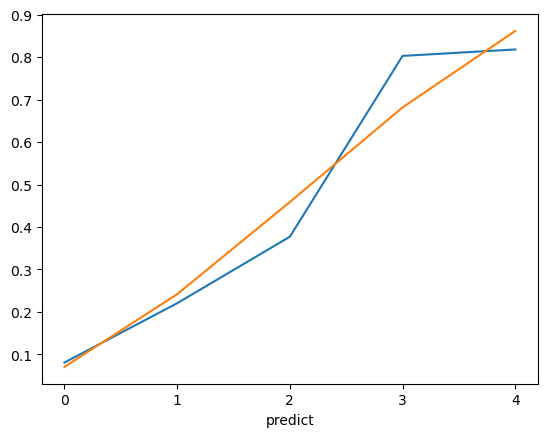

In [42]:
df['predict'] = reglog.predict(df)
cat_pred = pd.qcut(df['predict'], 5, duplicates="drop")


groupbs = df.groupby(cat_pred)


qualid = groupbs[['flag_doente']].count().rename(columns={'flag_doente':'contagem_d'})

qualid['mean_predi'] = groupbs['predict'].mean()

qualid['pct_doent'] = groupbs['flag_doente'].mean()

fig= plt.figure()
ax =fig.add_subplot(1,1,1)

ax =qualid['pct_doent'].plot(label='%predito')
ax = qualid['mean_predi'].plot(label='%observado')

ticks = ax.set_xticks([0,1,2,3,4])

label = ax.set_xticklabels([0,1,2,3,4])


5. Avalie o seu modelo quanto a discriminação calculando acurácia, GINI e KS.

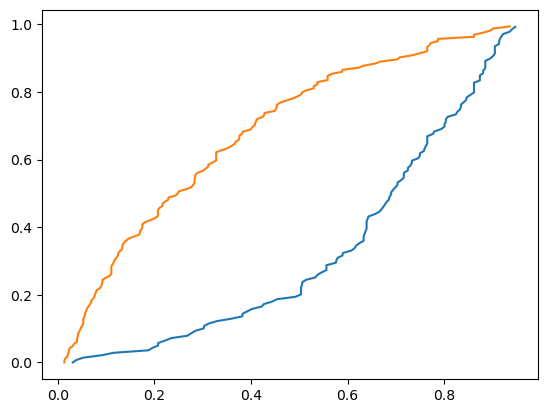

In [44]:
#grafico KS
fig= plt.figure()
ax =fig.add_subplot(1,1,1)

scorepop1 = df.loc[df['flag_doente']==1, 'predict']
ax.plot(np.sort(scorepop1), np.linspace(0,1, len(scorepop1), endpoint=False), label= 'doente')

scorepop2 = df.loc[df['flag_doente']!=1, 'predict']
ax.plot(np.sort(scorepop2), np.linspace(0,1, len(scorepop2), endpoint=False), label= 'saude')

act = metrics.accuracy_score(df['flag_doente'], df['predict']>.5)



In [56]:
print("acuracia", act)

fpr, tpr, thres = metrics.roc_curve(df['flag_doente'], df['predict'])
auc_ = metrics.auc(fpr, tpr)

#gini
gini = 2*auc_ -1


#ks
ks = ks_2samp(df.loc[df["flag_doente"] == 1, 'predict'], df.loc[df['flag_doente'] !=1, 'predict']).statistic

print("gini",gini)
print(ks, "ks")

acuracia 0.7722772277227723
gini 0.6781891559922792
0.5923407615371118 ks


6. tente melhorar o modelo obtido, por exemplo inserindo ou removendo variáveis.  
    Avalie as características do seu modelo (calibragem e acurácia).

In [53]:
reglogs = smf.logit("flag_doente ~ sex + cp + trestbps", data=df).fit()

reglogs.summary()

Optimization terminated successfully.
         Current function value: 0.529834
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      299
Method:                           MLE   Df Model:                            3
Date:                Thu, 07 Nov 2024   Pseudo R-squ.:                  0.2318
Time:                        17:34:47   Log-Likelihood:                -160.54
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 7.200e-21
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.7087      1.355     -6.426      0.000     -11.365      -6.052
sex            1.6110      0.315      5.119      0.000       0.994       2.228
cp             1.1540      0.167      6.907      0.000       0.827       1.482
trestbps       0.0279      0.008      3.467      0.001       0.012       0.044
==============================================================================
"""

C:\Users\gerar\AppData\Local\Temp\ipykernel_20212\912067162.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupbs = df.groupby(cat_pred)


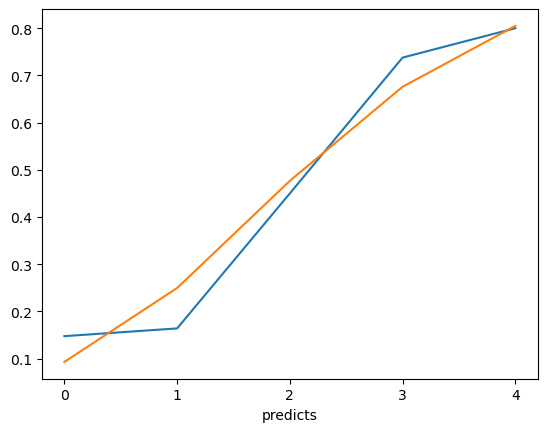

In [54]:
df['predicts'] = reglogs.predict(df)
cat_pred = pd.qcut(df['predicts'], 5, duplicates="drop")


groupbs = df.groupby(cat_pred)


qualid = groupbs[['flag_doente']].count().rename(columns={'flag_doente':'contagem_d'})

qualid['mean_predi'] = groupbs['predicts'].mean()

qualid['pct_doent'] = groupbs['flag_doente'].mean()

fig= plt.figure()
ax =fig.add_subplot(1,1,1)

ax =qualid['pct_doent'].plot(label='%predito')
ax = qualid['mean_predi'].plot(label='%observado')

ticks = ax.set_xticks([0,1,2,3,4])

label = ax.set_xticklabels([0,1,2,3,4])

acuracia 0.7722772277227723
gini 0.6275662396911739
0.5408843656781892 ks


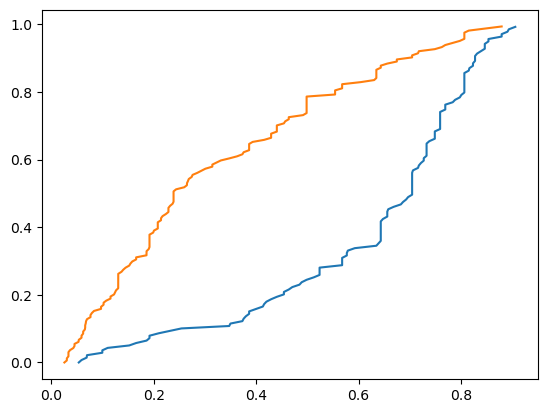

In [55]:

fig= plt.figure()
ax =fig.add_subplot(1,1,1)

scorepop1 = df.loc[df['flag_doente']==1, 'predicts']
ax.plot(np.sort(scorepop1), np.linspace(0,1, len(scorepop1), endpoint=False), label= 'doente')

scorepop2 = df.loc[df['flag_doente']!=1, 'predicts']
ax.plot(np.sort(scorepop2), np.linspace(0,1, len(scorepop2), endpoint=False), label= 'saude')

act = metrics.accuracy_score(df['flag_doente'], df['predicts']>.5)

print("acuracia", act)

fpr, tpr, thres = metrics.roc_curve(df['flag_doente'], df['predicts'])
auc_ = metrics.auc(fpr, tpr)

#gini
gini = 2*auc_ -1


#ks
ks = ks_2samp(df.loc[df["flag_doente"] == 1, 'predicts'], df.loc[df['flag_doente'] !=1, 'predicts']).statistic

print("gini",gini)
print(ks, "ks")